# BT3104 Project

## Group Members
### • Aaron Tay Jun Loong (A0233396Y)
### • Bryan Koh Wei En (A0233536H)
### • Elston Eng Shi Yang (A0229813B)

## Introduction

## Import Packages

In [1]:
# Data Manipulation & Visualization Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics

c:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read File

In [2]:
df = pd.read_csv('card-1.csv', header = 1)

nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


In [3]:
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

## Exploratory Data Analysis & Data Pre-Processing

In [4]:
# Rename this long column name with a simpler one
# Other variables Start with 1, so let's make PAY consistent
df = df.rename(columns={"default payment next month" : "DEFAULT", 
                        "PAY_0": "PAY_1"})

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


All variables except `SEX`, `EDUCATION`, `MARRIAGE` and `DEFAULT` are continuous data.  
The bank's clients are largely between the ages of 28 and 41, with the average age being 35 years old. Their typical client profile would be a 35-year old female with a university degree.   
Majority of the bank's clients are married or single, with a higher propotion being single. 
In general, the bank's client repay their debt on a timely basis, with the mean repayment status for the various months being lesser than 0. 
The average amount of bill statement across the months is NTD 44,976 and the average payment amount is 5,275.   
The average limit balance for the client's customers is 157,484, with the lowest limit being NTD 10,000 and the highest being NTD 1,000,000. 

In [6]:
# Create a subset list for categorical variables and continuous variables
cat_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
cont_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Set cat vars as type 'category'
# df[cat_vars] = df[cat_vars].astype('category') # If we do this, then corr plot will not contain categorical vars

# Double Check
# print(df.dtypes)

# We know that ID is a unique identifier for each row. Let us create a different dataset without ID to avoid unnecessary information.
df_nid = df.iloc[:, 1:25]

### Check for missing or null values

In [7]:
print(df.info())
# Double Check
print(df.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

### Correlation with Heatmap

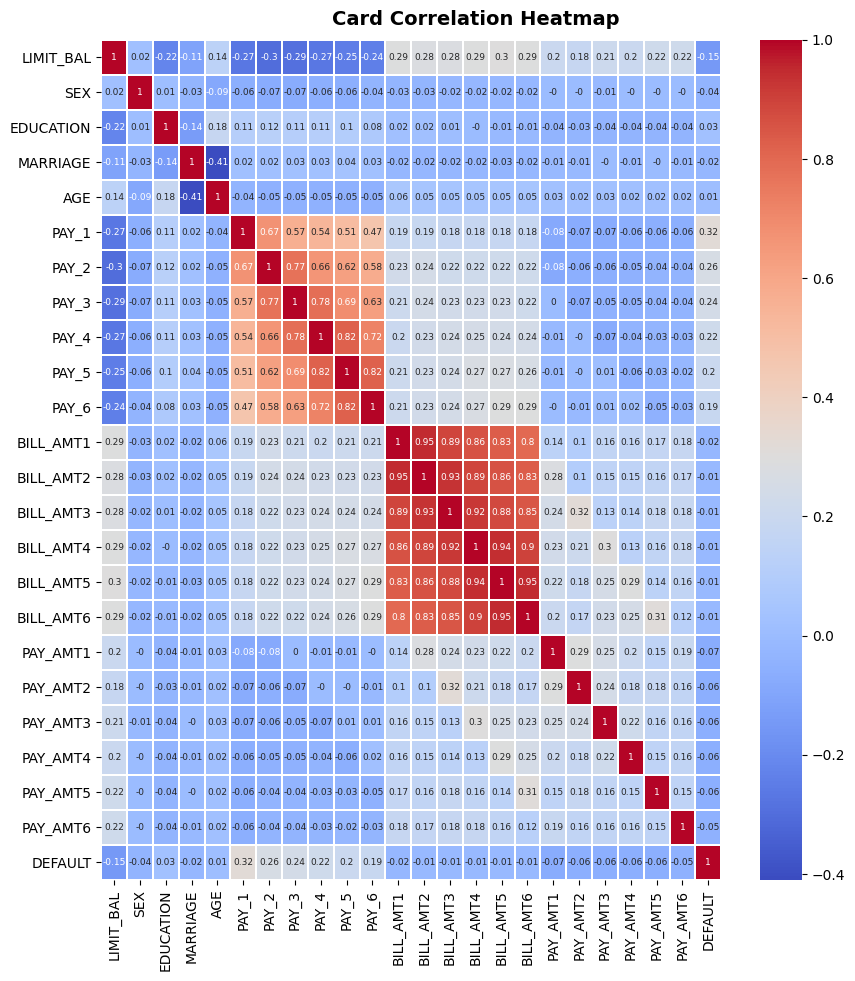

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

hm = sns.heatmap(round(df_nid.corr(),2), 
                 ax=ax,
                 cmap="coolwarm",
                 annot=True,
                 annot_kws={"size": 6.5},
                 linewidths=0.03)

fig.subplots_adjust(top=0.95)

t = fig.suptitle('Card Correlation Heatmap', fontsize=14, fontweight='bold')

There is very little correlation between various categorical varaibles and whether the customer will default. Hence, they should not be the primary input drivers of our model. 
We see a higher correlation between the repayment status for September 2005 and whether the customer will default in October 2005. This is because our model is time senstive and could be placing more weight on recent events. 

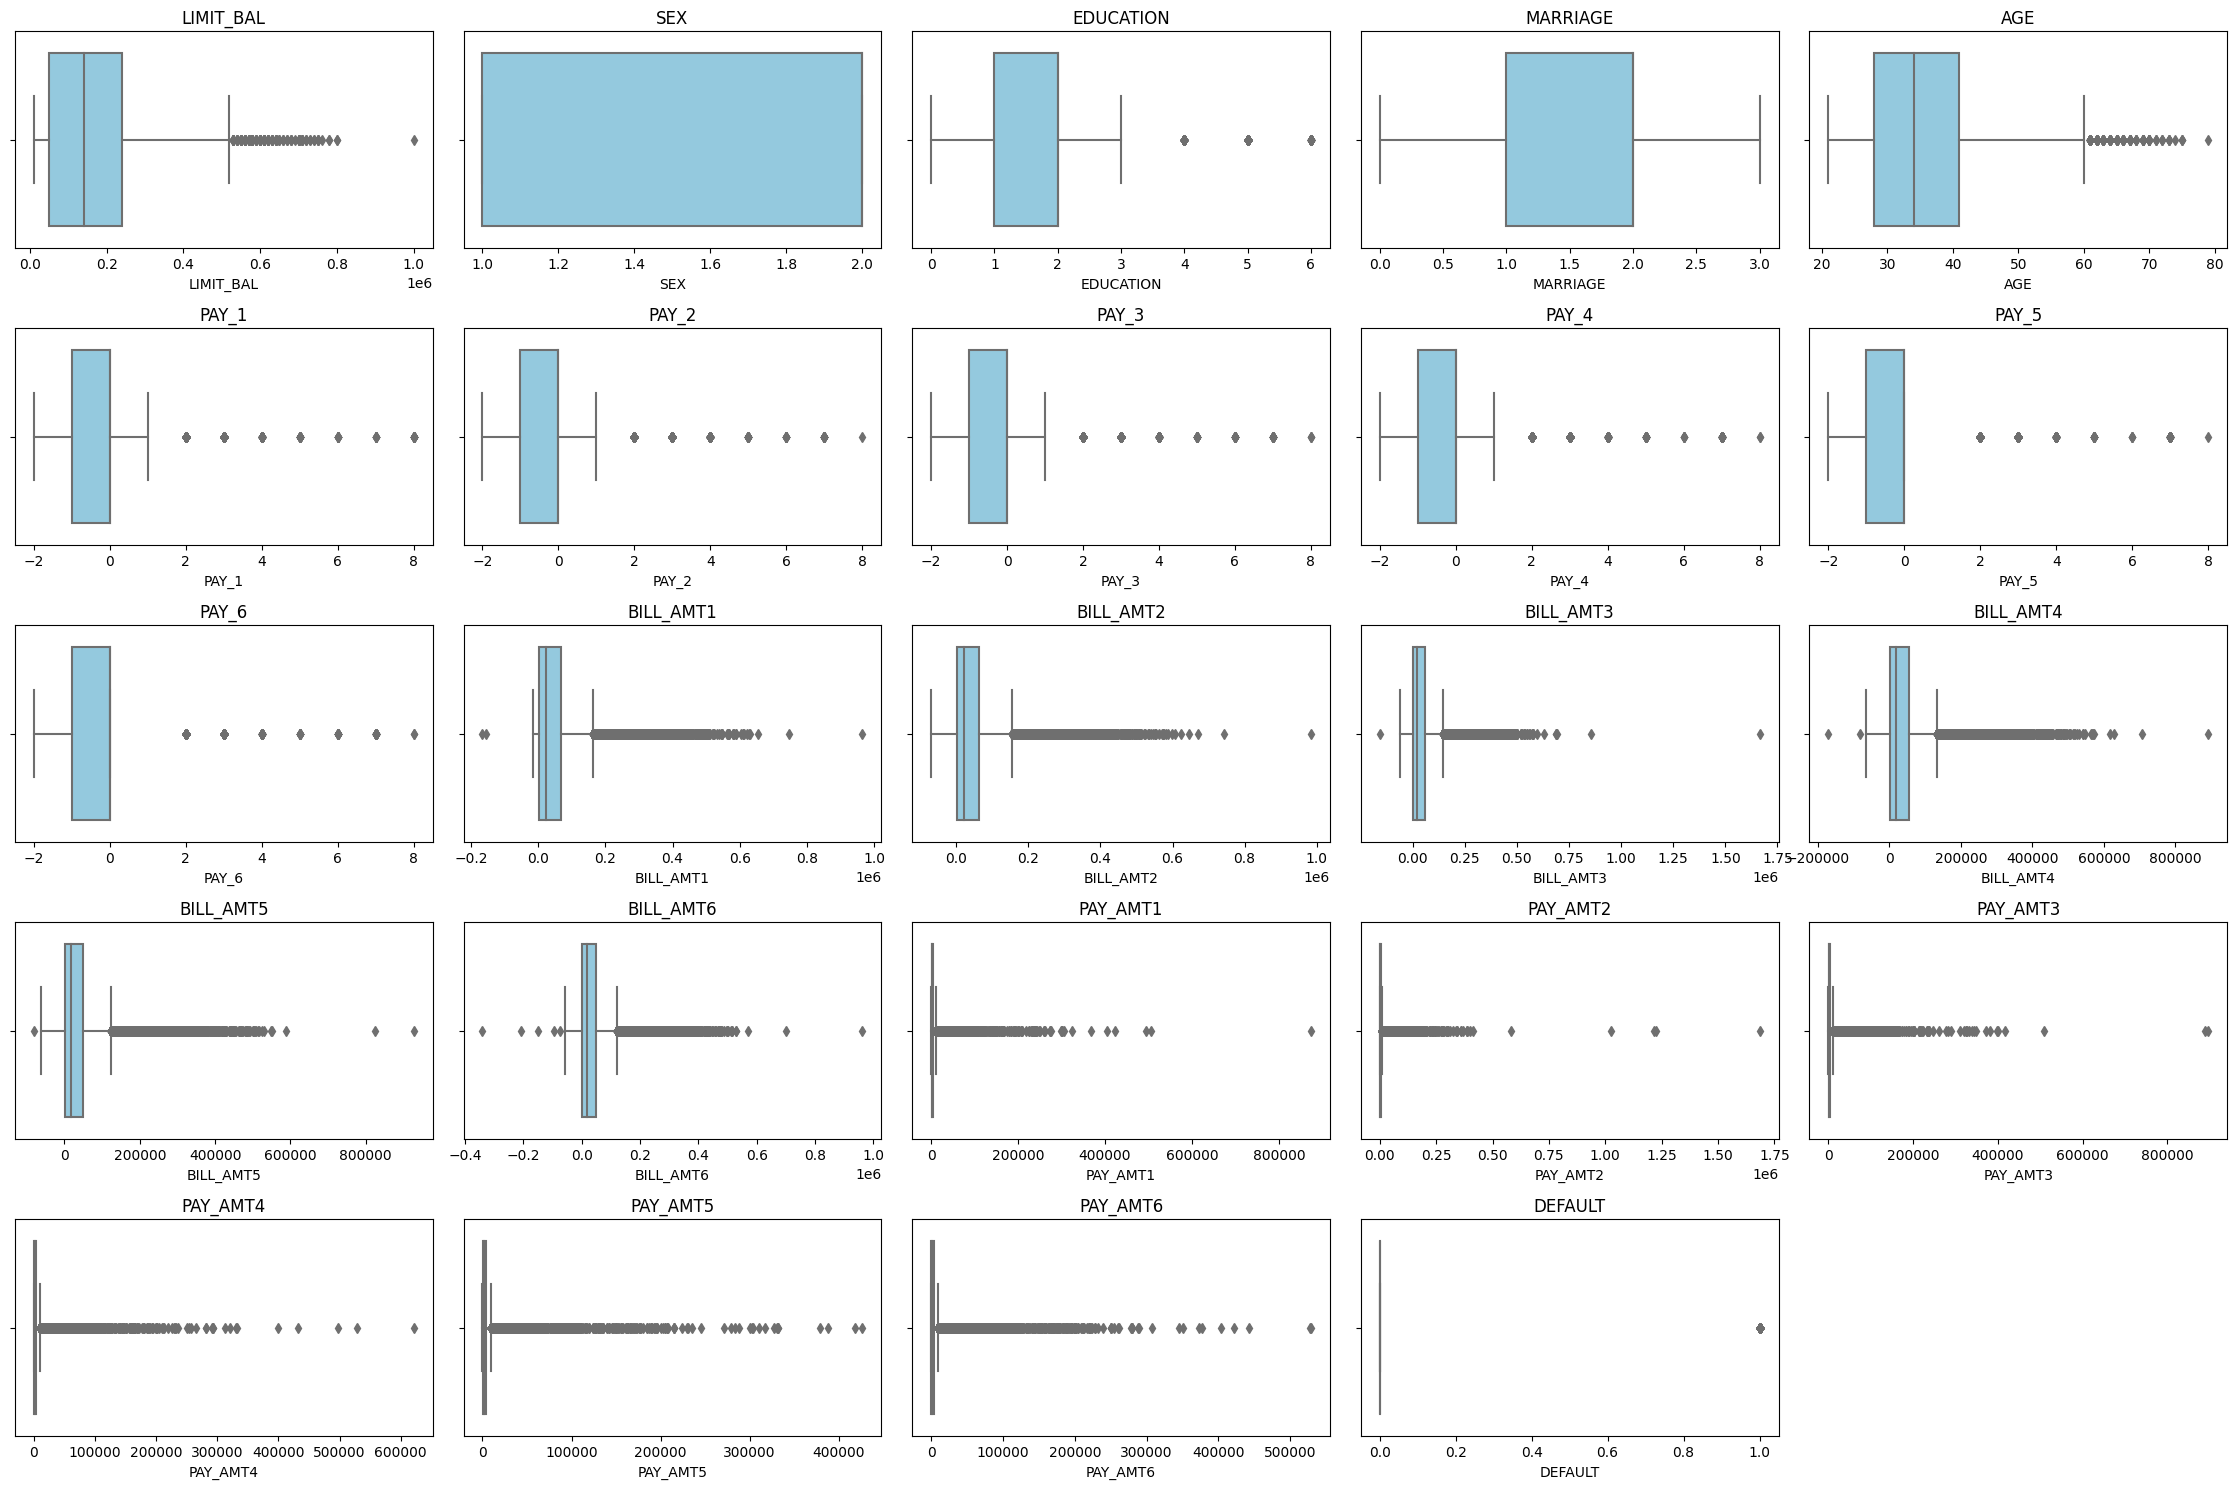

In [9]:
# Boxplots
# Set the number of columns in the grid
num_cols = 5

# Calculate the number of rows needed based on the number of variables
num_vars = len(df_nid.columns)
num_rows = (num_vars + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each variable and create a horizontal boxplot
for i, var in enumerate(df_nid.columns):
    ax = axes[i]
    sns.boxplot(x=df_nid[var], ax=ax, color='skyblue')
    ax.set_title(var)

# Remove any empty subplots
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

# Show the grid of boxplots
plt.show()

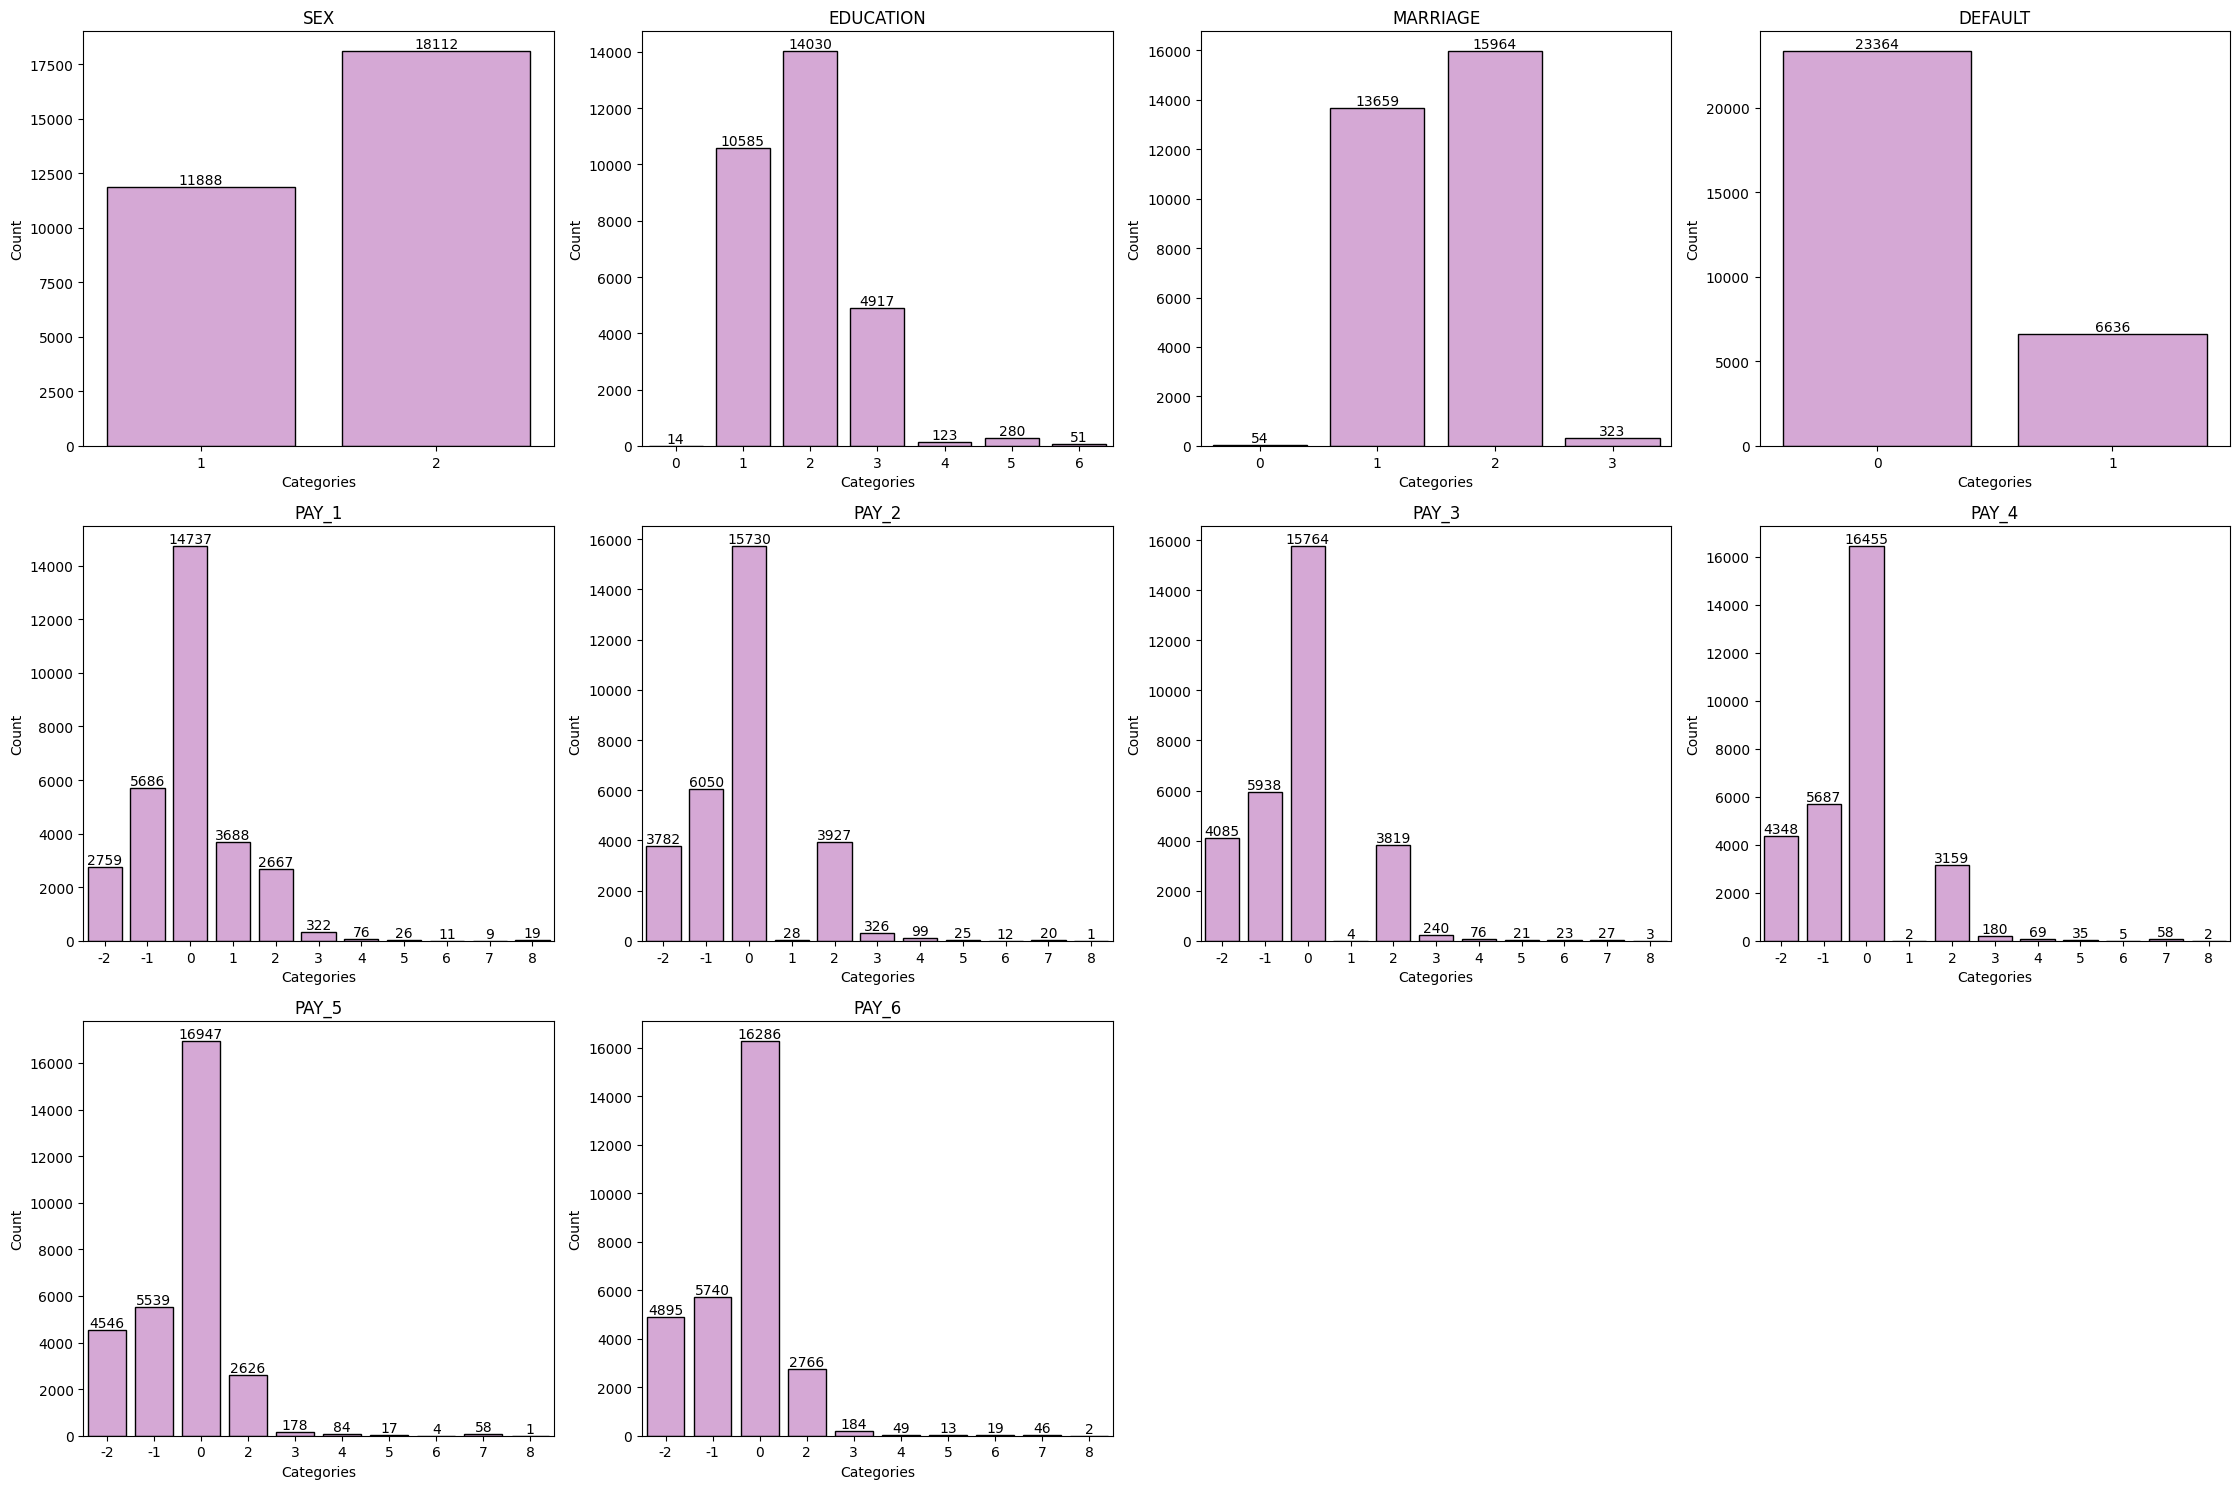

In [10]:
# Histograms for Categorical Variables - Take a look at their distribution

# Calculate the number of rows and columns for the grid
num_vars = len(cat_vars)
num_cols = 4  # Number of columns in the grid
num_rows = (num_vars + num_cols - 1) // num_cols

# Create a figure and axis for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each categorical variable and create a count plot
for i, var in enumerate(cat_vars):
    ax = axes[i]
    sns.countplot(x=df_nid[var], ax=ax, color='plum', edgecolor='black', linewidth=1)
    ax.bar_label(container=ax.containers[0])
    ax.set_title(var)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')

# Remove any empty subplots
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

# Show the grid of count plots
plt.show()

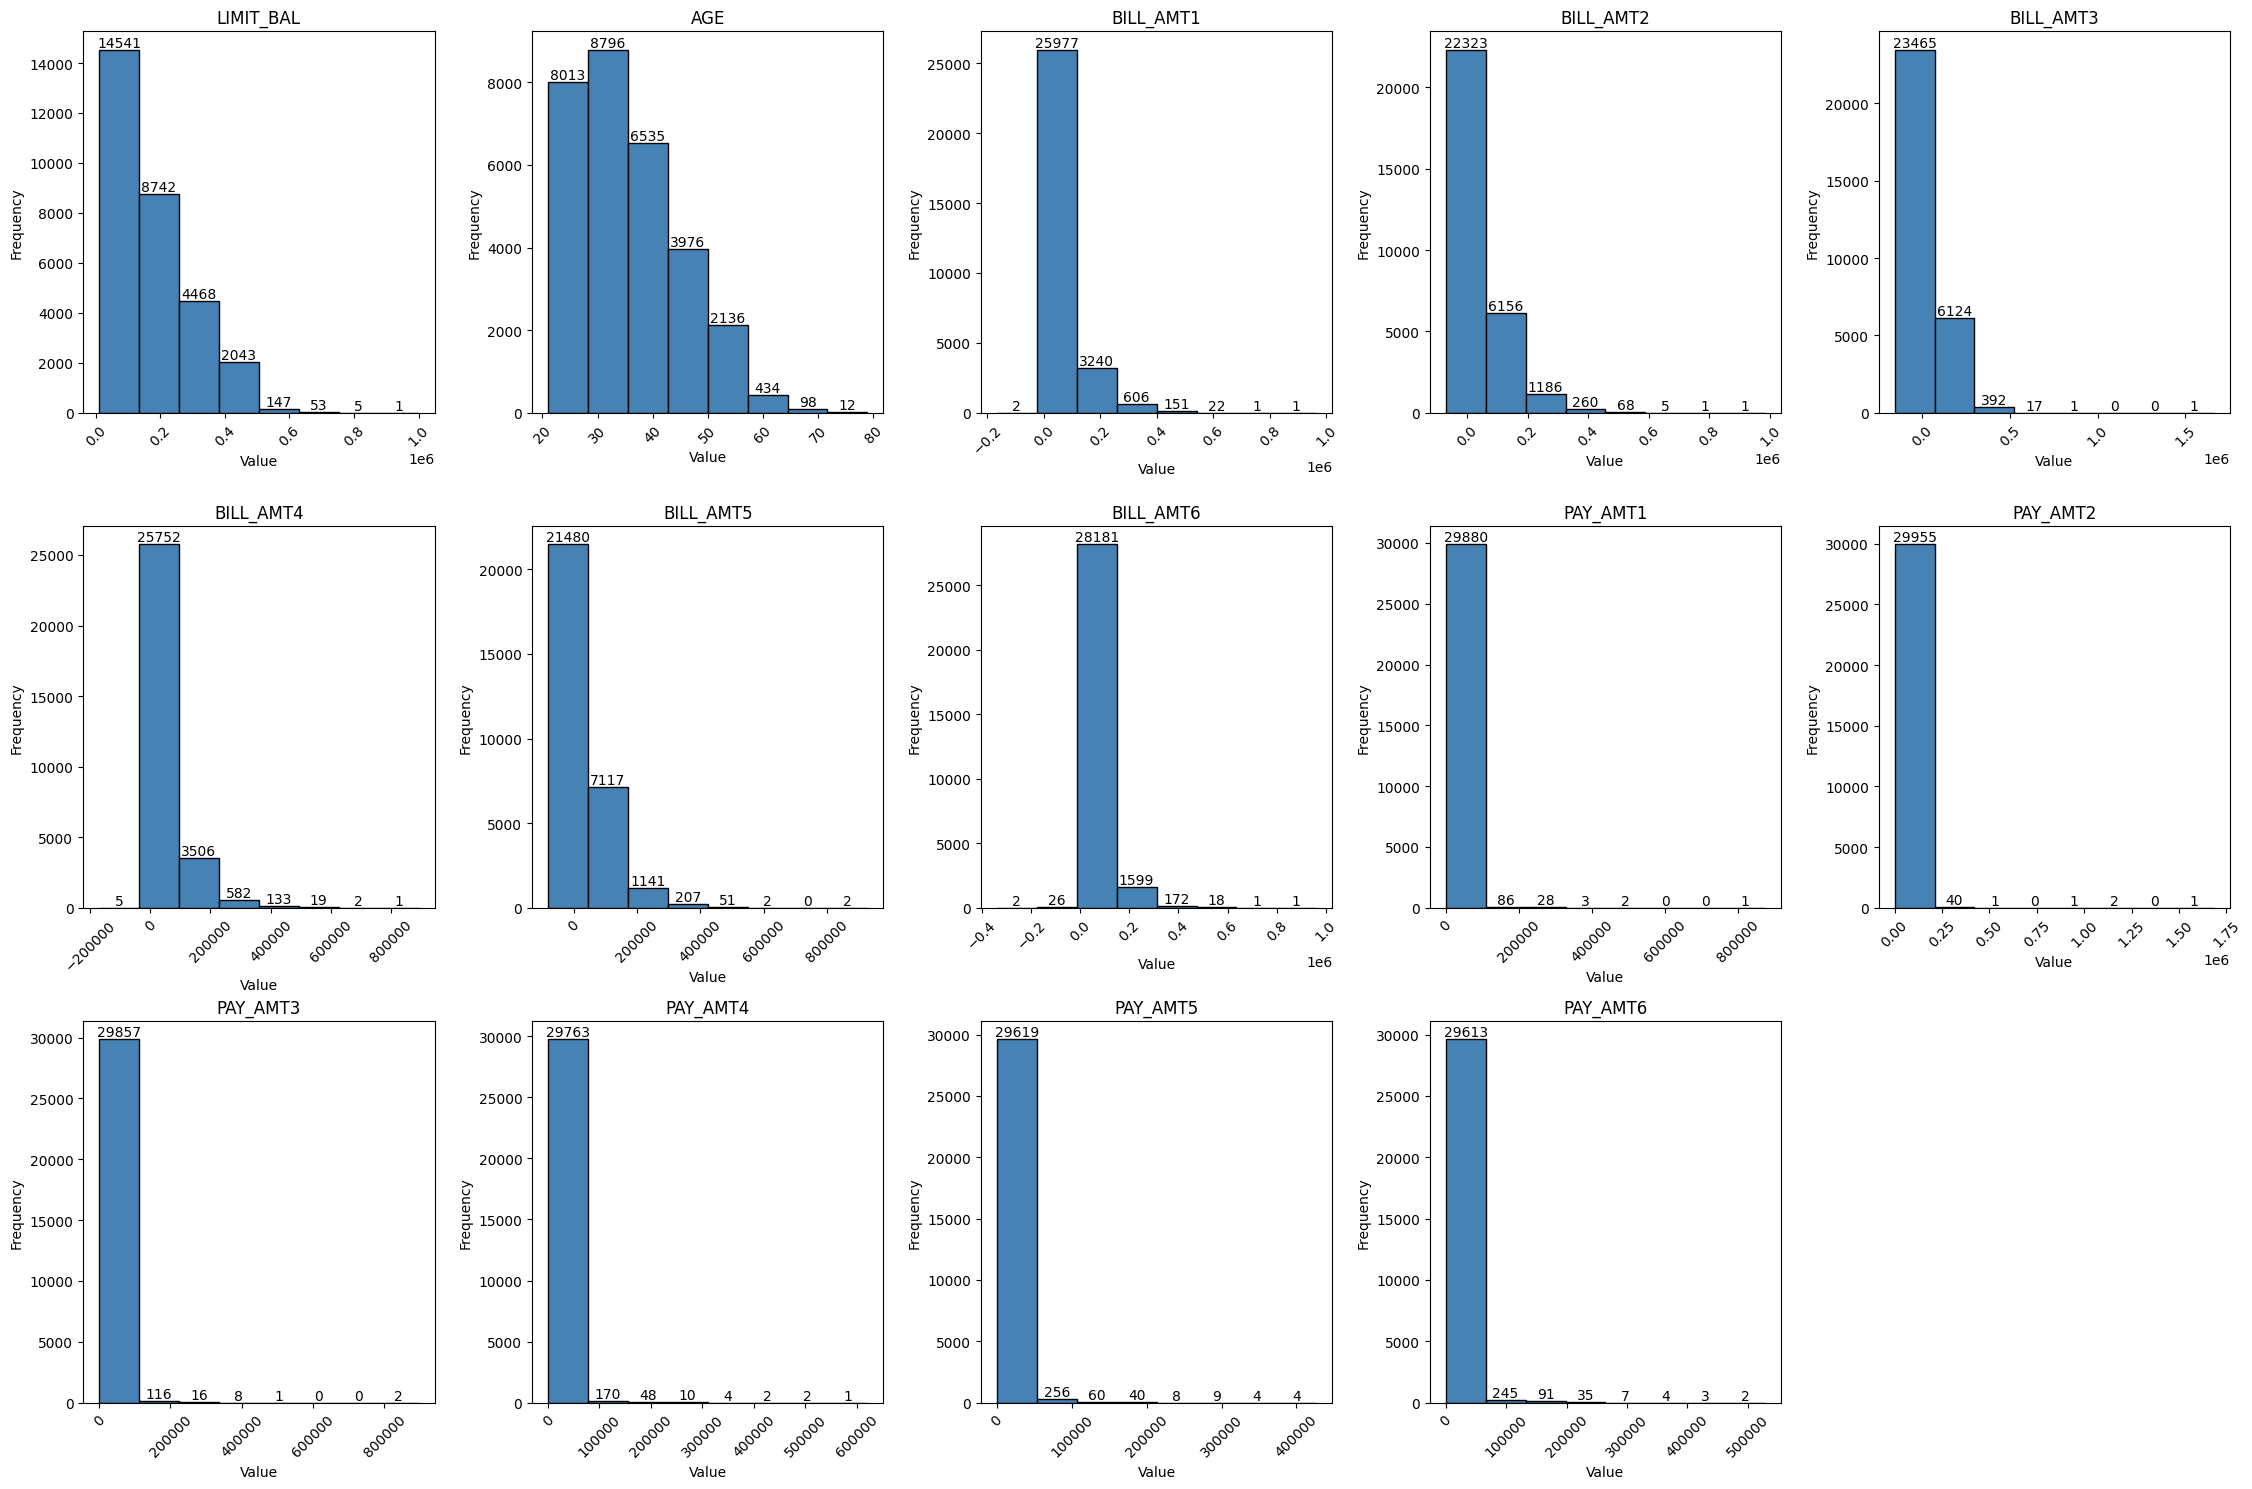

In [11]:
# Histograms for Continuous Variables - Take a look at their distribution

num_vars = len(cont_vars)
num_cols = 5
num_rows = (num_vars + num_cols - 1) // num_cols

# Create a figure and axis for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each continuous variable and plot a histogram
for i, var in enumerate(cont_vars):
    ax = axes[i]
    values, bins, bars = ax.hist(df_nid[var], bins=8, color='steelblue', edgecolor='black', linewidth=1.0)
    ax.set_title(var)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)
    ax.bar_label(bars)

# Remove any empty subplots
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

# Show the grid of histograms
plt.show()

Looking at the boxplots, we see potential anomalies within the data. Although the maximum limit balance is 1,000,000, we see one bill amount exceeding this limit for the bill statements in July 2005. As this incorrect billing was repaid in full as seen in 'PAY_AMT2', I believe that the bill and pay amount figure was incorrectly recorded.  
** Propose to remove that datapoint **

## Change Data Inconsistencies...

In [12]:
# Check Marital Status -- Why is there 0?
print(df_nid['MARRIAGE'].value_counts())

# According to documentation, 1: married, 2: single, 3: others
# So we should pre-process and change #0 to #3
df_nid['MARRIAGE'].replace({0: 3}, inplace=True)
print('Marriage Categories replaced...')
print(df_nid['MARRIAGE'].value_counts())

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
Marriage Categories replaced...
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


c:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
# Check Education Categories -- It seems like there are some redundant values
print(df_nid['EDUCATION'].value_counts())

# According to documentation, #1 - Grad Sch, #2 - Uni, #3 - High School, #4 - Others
# So we should pre-process and change #0, #5, #6 to #4
df_nid['EDUCATION'].replace({0: 4, 5: 4, 6: 4}, inplace=True)
print('Education Categories replaced...')
print(df_nid['EDUCATION'].value_counts())

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
Education Categories replaced...
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


In [14]:
# Check PAY_X -- Why is there -2 and 0?
# From documentation, -1: Pay Duly, 1: Pay Delay by 1 Month, ... , 9: Pay Delay by >= 9 Months
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for column in pay_cols:
    unique_values = df_nid[column].unique()
    print(f'Column: {column} -- {unique_values}')

# Ok, let's change it
df_nid[pay_cols] = df_nid[pay_cols].applymap(lambda x: -1 if x in [-2, 0] else x)
print("PAY_X Columns replaced...")
for column in pay_cols:
    unique_values = df_nid[column].unique()
    print(f'Column: {column} -- {unique_values}')


Column: PAY_1 -- [ 2 -1  0 -2  1  3  4  8  7  5  6]
Column: PAY_2 -- [ 2  0 -1 -2  3  5  7  4  1  6  8]
Column: PAY_3 -- [-1  0  2 -2  3  4  6  7  1  5  8]
Column: PAY_4 -- [-1  0 -2  2  3  4  5  7  6  1  8]
Column: PAY_5 -- [-2  0 -1  2  3  5  4  7  8  6]
Column: PAY_6 -- [-2  2  0 -1  3  6  4  7  8  5]
PAY_X Columns replaced...
Column: PAY_1 -- [ 2 -1  1  3  4  8  7  5  6]
Column: PAY_2 -- [ 2 -1  3  5  7  4  1  6  8]
Column: PAY_3 -- [-1  2  3  4  6  7  1  5  8]
Column: PAY_4 -- [-1  2  3  4  5  7  6  1  8]
Column: PAY_5 -- [-1  2  3  5  4  7  8  6]
Column: PAY_6 -- [-1  2  3  6  4  7  8  5]


c:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Proportion of default and non-default for given df
After calculation, we see that the proportion of default payments is around 22% for the main data
set.

In [15]:
print('Percentage of default in original dataset: ', round(df_nid['DEFAULT'].value_counts()[1]/len(df_nid)*100,2), '%')

Percentage of default in original dataset:  22.12 %


<AxesSubplot:xlabel='DEFAULT', ylabel='count'>

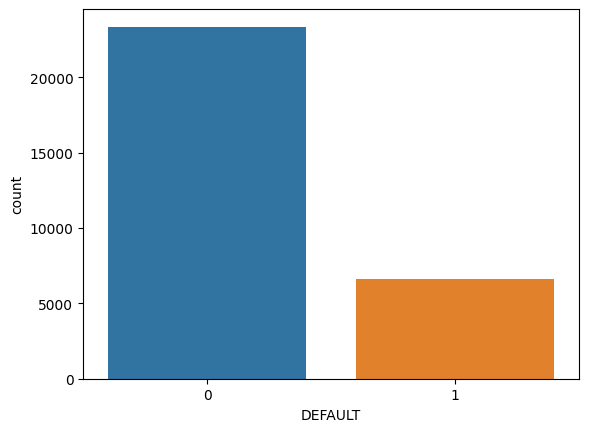

In [16]:
sns.countplot(x='DEFAULT', data=df_nid)



## Plotting of graphs to see the trend of the variables

(array([0, 1, 2]), [Text(0, 0, '2'), Text(1, 0, '1'), Text(2, 0, '3')])

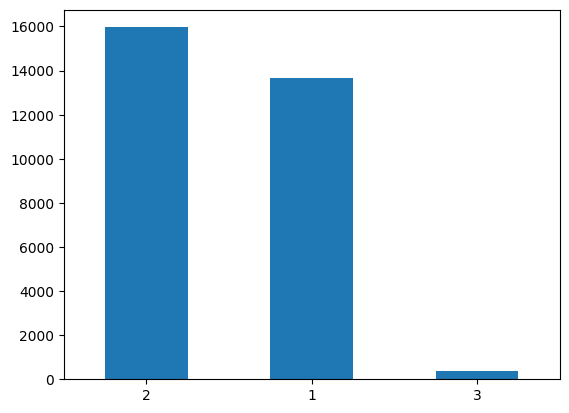

In [17]:
df_nid.MARRIAGE.value_counts().plot(kind = 'bar')
plt.xticks(fontsize=10, rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, '2'), Text(1, 0, '1'), Text(2, 0, '3'), Text(3, 0, '4')])

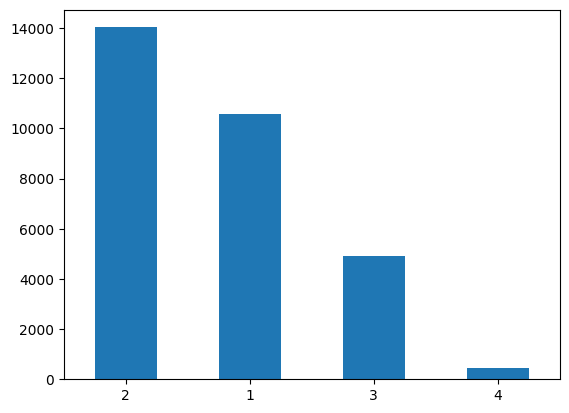

In [18]:
df_nid.EDUCATION.value_counts().plot(kind = "bar")
plt.xticks(fontsize=10, rotation=0)

<AxesSubplot:xlabel='DEFAULT', ylabel='LIMIT_BAL'>

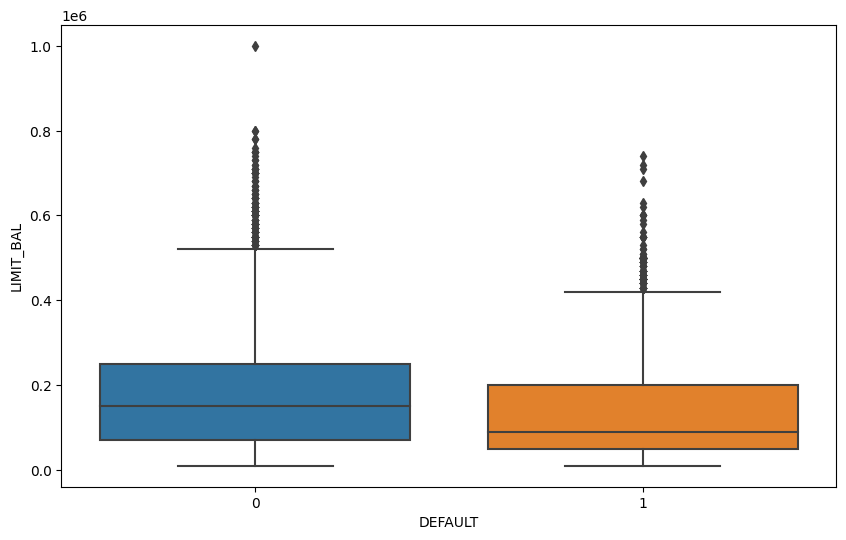

In [19]:
# plot boxplot for limit balance by default
plt.figure(figsize=(10,6))
sns.boxplot(x='DEFAULT', y='LIMIT_BAL', data=df_nid)

- We can viualize that the limit balance of those who default is slightly lower than those who do not default. Thus, limit balance may play a part in predicting of default payments.

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

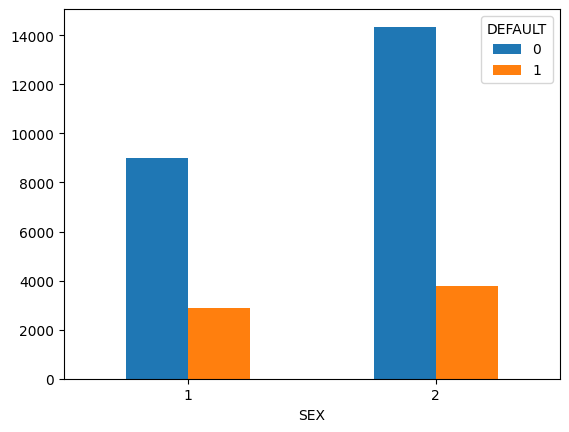

In [20]:
gender = df_nid.groupby(['SEX', 'DEFAULT']).size().unstack(1)
gender.plot(kind='bar')
plt.xticks(fontsize=10, rotation=0)

<AxesSubplot:xlabel='DEFAULT', ylabel='AGE'>

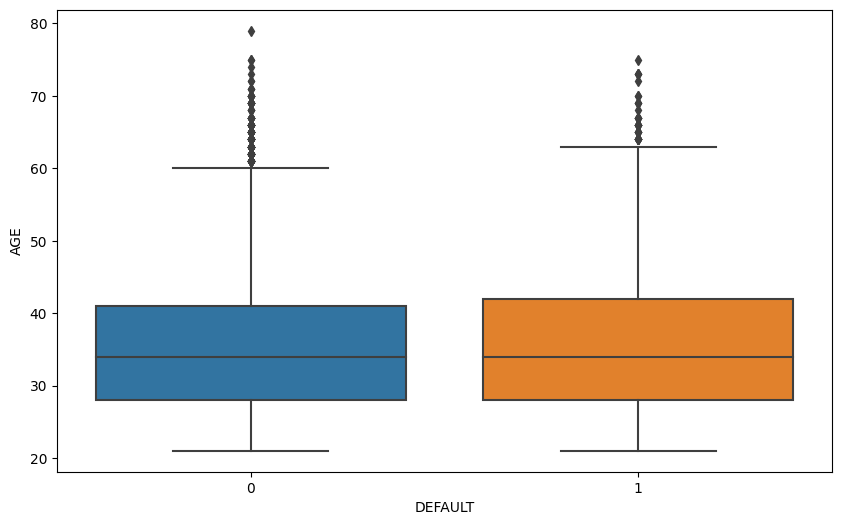

In [21]:
# plot boxplot for age by default
plt.figure(figsize=(10,6))
sns.boxplot(x='DEFAULT', y='AGE', data=df_nid)

From the boxplot, the age input attribute will not be useful since the distribution of age for default and non-default is about the same. We will use Data Encoding on age variable to see if age can be useful. Minimum age is 21, maximum age is 79.
Using statistics in Singapore, we have decided to split the age groups as [21, 30], [31, 40],[41, 54], [55, 80]. 21-30 years old are young graduates who just joined the workforce. 31-40 are working adults and have a more stable income. 41-54 are individuals who worked for very long and have a stable income. Aged 55 and above are either retired individuals or those who need a lot of money for their lifestyle after retiring

In [22]:
# adding a new column to the dataframe to categorize age
groups = [20, 30, 40, 54, 80]
groups_names = [1, 2, 3, 4]

df_nid['AGE_GRP'] = pd.cut(df['AGE'], groups, labels=groups_names)
# do for train and test also

In [23]:
df_nid.AGE_GRP.value_counts()

1    11013
2    10713
3     7221
4     1053
Name: AGE_GRP, dtype: int64

<AxesSubplot:xlabel='AGE_GRP'>

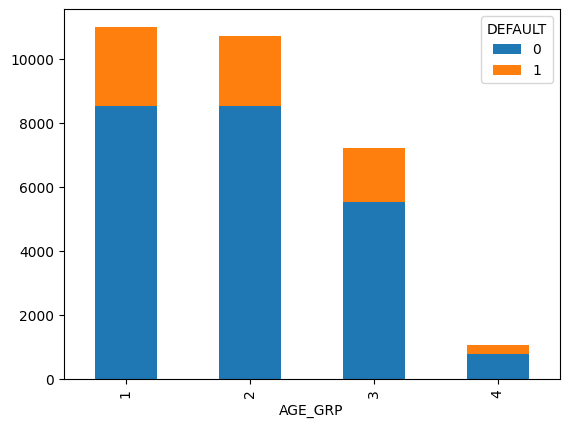

In [24]:
age = df_nid.groupby(['AGE_GRP', 'DEFAULT']).size().unstack(1)
age.plot(kind='bar', stacked = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_6808\4142252286.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


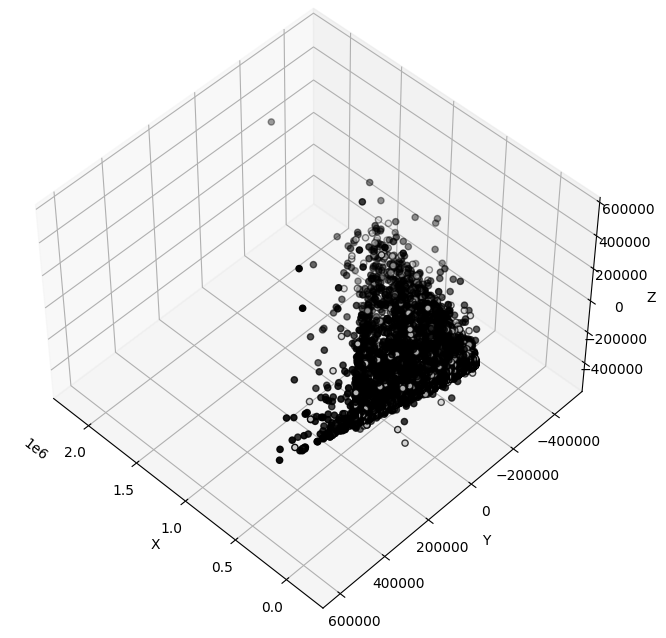

In [25]:
pca = PCA(n_components=3)
pca.fit(df)
X = pca.transform(df)
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Put more colors for more clusters
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=df['DEFAULT'], cmap=plt.cm.nipy_spectral, edgecolor='k')
plt.show()

# Model before feature selection
Use MinMaxScaler() to transform the data into values between 0 and 1. This is because input variables in different magnitudes will contribute differently to feature selection and fitting of model and this will lead to bias when numbers of larger magnitude gets “prioritised”. MinMaxScaler() serves to deal with such a potential problem. MinMaxScalar subtracts the minimum value in the feature and divides it by the range. This can preserve the shape of the original distribution without changing the information embedded in the 
data.

In [26]:
from sklearn.preprocessing import StandardScaler
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GRP', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

y = df_nid['DEFAULT']
x = df_nid.drop(columns=['DEFAULT'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1234)

xtrain_scaler = MinMaxScaler().fit_transform(x_train)
xtest_scaler = MinMaxScaler().fit_transform(x_test)

# Aaron test scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
svm = SVC(kernel='rbf', C=1)
# Fitting␣ model with xtrain_scaler and y_train
best_model = svm.fit(xtrain_scaler, y_train) 
# Predicting the results
svm_pred = best_model.predict(xtest_scaler) 
confu_matr = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix: \n {}".format(confu_matr))

Confusion Matrix: 
 [[5613  187]
 [1263  437]]


In [28]:
print(metrics.classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5800
           1       0.70      0.26      0.38      1700

    accuracy                           0.81      7500
   macro avg       0.76      0.61      0.63      7500
weighted avg       0.79      0.81      0.77      7500



In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, svm_pred))
print("Precision:",metrics.precision_score(y_test, svm_pred))

Accuracy: 0.8066666666666666
Recall/Sensitivity/True Positive Rate: 0.2570588235294118
Precision: 0.7003205128205128


In [30]:
# run 'pip install scikit-learn' to run commands
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the Random Forest model, 100 estimators used to reduce runtime 
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)  

# Fit the model to the training data
rfmodel.fit(x_train_scaled, y_train)

# Make predictions on the test set
pred_rf = rfmodel.predict(x_test_scaled)

print("Accuracy:",metrics.accuracy_score(y_test, pred_rf))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, pred_rf))
print("Precision:",metrics.precision_score(y_test, pred_rf))

Accuracy: 0.8106666666666666
Recall/Sensitivity/True Positive Rate: 0.36823529411764705
Precision: 0.6440329218106996


In [31]:
confu_matr_rf = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix: \n {}".format(confu_matr_rf))

Confusion Matrix: 
 [[5454  346]
 [1074  626]]


In [32]:
print(metrics.classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      5800
           1       0.64      0.37      0.47      1700

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.68      7500
weighted avg       0.79      0.81      0.79      7500



Cannot use Naive Bayes model as our x input contains negative values

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model, setting the number of neighbours to 5
knnmodel = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knnmodel.fit(x_train_scaled, y_train)

# Make predictions on the test data
pred_knn = knnmodel.predict(x_test_scaled)

print("Accuracy:",metrics.accuracy_score(y_test, pred_knn))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, pred_knn))
print("Precision:",metrics.precision_score(y_test, pred_knn))

Accuracy: 0.7877333333333333
Recall/Sensitivity/True Positive Rate: 0.3688235294117647
Precision: 0.5471204188481675


In [34]:
confu_matr_knn = confusion_matrix(y_test, pred_knn)
print("Confusion Matrix: \n {}".format(confu_matr_knn))

Confusion Matrix: 
 [[5281  519]
 [1073  627]]


In [35]:
print(metrics.classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      5800
           1       0.55      0.37      0.44      1700

    accuracy                           0.79      7500
   macro avg       0.69      0.64      0.65      7500
weighted avg       0.77      0.79      0.77      7500



In [36]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
logisticmodel = LogisticRegression(max_iter=10000)

# Fit the model to the training data
logisticmodel.fit(x_train_scaled, y_train)

# Make predictions on the test data
pred_log = logisticmodel.predict(x_test_scaled)

print("Accuracy:",metrics.accuracy_score(y_test, pred_log))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, pred_log))
print("Precision:",metrics.precision_score(y_test, pred_log))

Accuracy: 0.8116
Recall/Sensitivity/True Positive Rate: 0.3235294117647059
Precision: 0.6765067650676507


In [37]:
confu_matr_log = confusion_matrix(y_test, pred_log)
print("Confusion Matrix: \n {}".format(confu_matr_log))

Confusion Matrix: 
 [[5537  263]
 [1150  550]]


In [38]:
print(metrics.classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5800
           1       0.68      0.32      0.44      1700

    accuracy                           0.81      7500
   macro avg       0.75      0.64      0.66      7500
weighted avg       0.79      0.81      0.79      7500



In [39]:
# install in terminal 'pip install tensorflow'
import tensorflow as tf

# Create a simple neural network model
neuralmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

# Compile the model
neuralmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
neuralmodel.fit(x_train_scaled, y_train, epochs=10, batch_size=32, verbose=2)

# Make predictions on the test data
pred_neural = (neuralmodel.predict(x_test_scaled) > 0.5).astype(int).flatten()

print("Accuracy:",metrics.accuracy_score(y_test, pred_neural))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, pred_neural))
print("Precision:",metrics.precision_score(y_test, pred_neural))

Epoch 1/10
704/704 - 4s - loss: 0.4545 - accuracy: 0.8136 - 4s/epoch - 6ms/step
Epoch 2/10
704/704 - 2s - loss: 0.4384 - accuracy: 0.8184 - 2s/epoch - 2ms/step
Epoch 3/10
704/704 - 2s - loss: 0.4337 - accuracy: 0.8206 - 2s/epoch - 3ms/step
Epoch 4/10
704/704 - 2s - loss: 0.4302 - accuracy: 0.8213 - 2s/epoch - 3ms/step
Epoch 5/10
704/704 - 2s - loss: 0.4290 - accuracy: 0.8213 - 2s/epoch - 3ms/step
Epoch 6/10
704/704 - 2s - loss: 0.4274 - accuracy: 0.8216 - 2s/epoch - 2ms/step
Epoch 7/10
704/704 - 2s - loss: 0.4254 - accuracy: 0.8229 - 2s/epoch - 2ms/step
Epoch 8/10
704/704 - 2s - loss: 0.4237 - accuracy: 0.8231 - 2s/epoch - 2ms/step
Epoch 9/10
704/704 - 2s - loss: 0.4229 - accuracy: 0.8238 - 2s/epoch - 2ms/step
Epoch 10/10
704/704 - 1s - loss: 0.4217 - accuracy: 0.8229 - 1s/epoch - 2ms/step
235/235 [==============================] - 1s 2ms/step
Accuracy: 0.8132
Recall/Sensitivity/True Positive Rate: 0.36470588235294116
Precision: 0.6588735387885228


In [40]:
confu_matr_neural = confusion_matrix(y_test, pred_neural)
print("Confusion Matrix: \n {}".format(confu_matr_neural))

Confusion Matrix: 
 [[5479  321]
 [1080  620]]


In [41]:
print(metrics.classification_report(y_test,pred_neural))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5800
           1       0.66      0.36      0.47      1700

    accuracy                           0.81      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.81      0.79      7500

